In [12]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Loading CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizing the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Converting class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [14]:
from sklearn.model_selection import train_test_split

# Splitting the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [15]:
# Ensuring the data is split and labeled correctly

print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Test set shape: {x_test.shape}, {y_test.shape}")
print(f"Validation set shape: {x_val.shape}, {y_val.shape}")


Training set shape: (40000, 32, 32, 3), (40000, 10)
Validation set shape: (10000, 32, 32, 3), (10000, 10)
Test set shape: (10000, 32, 32, 3), (10000, 10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Building the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


# Compiling the model
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])


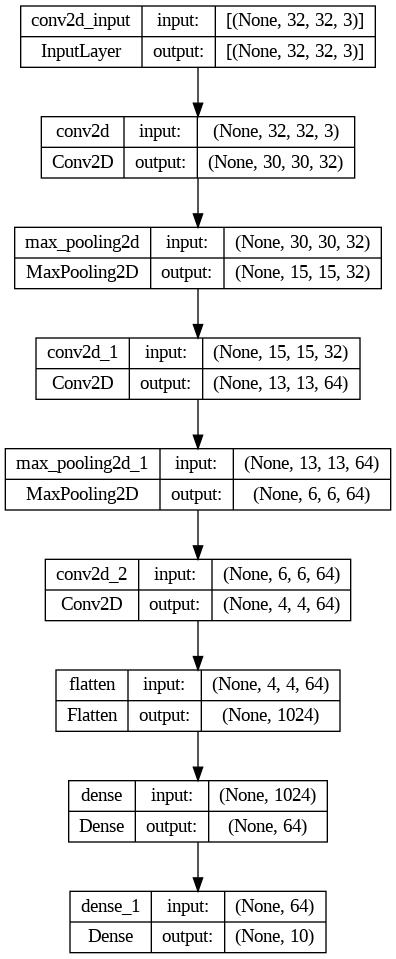

In [17]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Plotting the model and saving to file for presentation
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the model plot inline
Image(filename='model_plot.png')


In [5]:
from keras import callbacks

# Preventing overfitting by training for an optimal number of epochs
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

# Training the model
MyModel = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=25,
                    validation_data=(x_val, y_val),
                    callbacks = [earlystopping])


Epoch 1/25
313/313 [==============================] - 51s 158ms/step - loss: 1.7507 - accuracy: 0.3557 - val_loss: 1.4544 - val_accuracy: 0.4792
Epoch 2/25
313/313 [==============================] - 46s 148ms/step - loss: 1.3809 - accuracy: 0.5043 - val_loss: 1.3236 - val_accuracy: 0.5305
Epoch 3/25
313/313 [==============================] - 59s 188ms/step - loss: 1.2268 - accuracy: 0.5641 - val_loss: 1.1757 - val_accuracy: 0.5834
Epoch 4/25
313/313 [==============================] - 57s 181ms/step - loss: 1.1321 - accuracy: 0.5997 - val_loss: 1.1117 - val_accuracy: 0.6133
Epoch 5/25
313/313 [==============================] - 53s 168ms/step - loss: 1.0531 - accuracy: 0.6286 - val_loss: 1.0543 - val_accuracy: 0.6301
Epoch 6/25
313/313 [==============================] - 52s 166ms/step - loss: 0.9949 - accuracy: 0.6523 - val_loss: 1.0229 - val_accuracy: 0.6426
Epoch 7/25
313/313 [==============================] - 49s 155ms/step - loss: 0.9443 - accuracy: 0.6709 - val_loss: 0.9603 - val_ac

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 4s 12ms/step - loss: 0.8907 - accuracy: 0.7040
Test accuracy: 0.7039999961853027


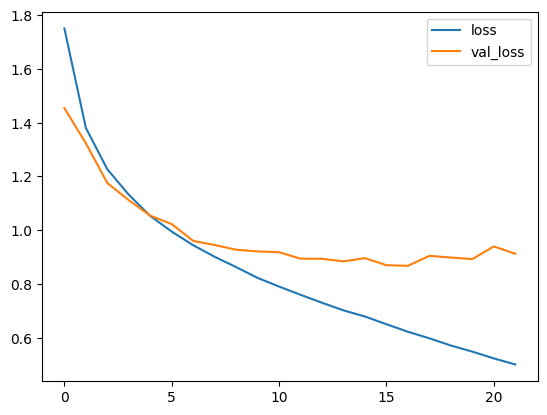

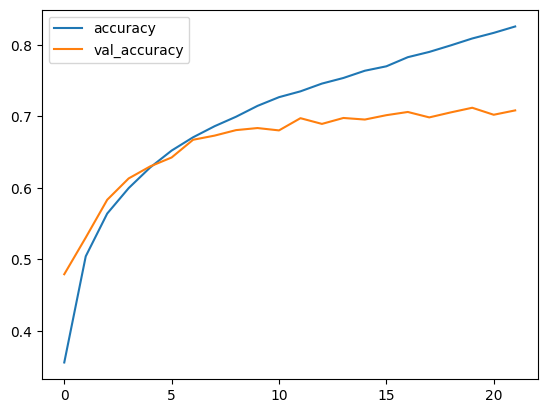

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the training and validation accuracy with each epoch
MyModel_df = pd.DataFrame(MyModel.history)
MyModel_df.loc[:, ['loss', 'val_loss']].plot()
MyModel_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
